In [142]:
import os
import numpy as np

np.random.seed(42)

In [143]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "pokemon_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [144]:
POKEMON_PATH = os.path.join("datasets", "pokemon")

In [145]:
import pandas as pd

def load_pokemon_data(pokemon_path=POKEMON_PATH):
    csv_path = os.path.join(pokemon_path, "pokemon.csv")
    return pd.read_csv(csv_path)

In [146]:
pokemon = load_pokemon_data()
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [147]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [148]:
pokemon["Legendary"].value_counts()

Legendary
False    735
True      65
Name: count, dtype: int64

In [149]:
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Saving figure attribute_histogram_plots


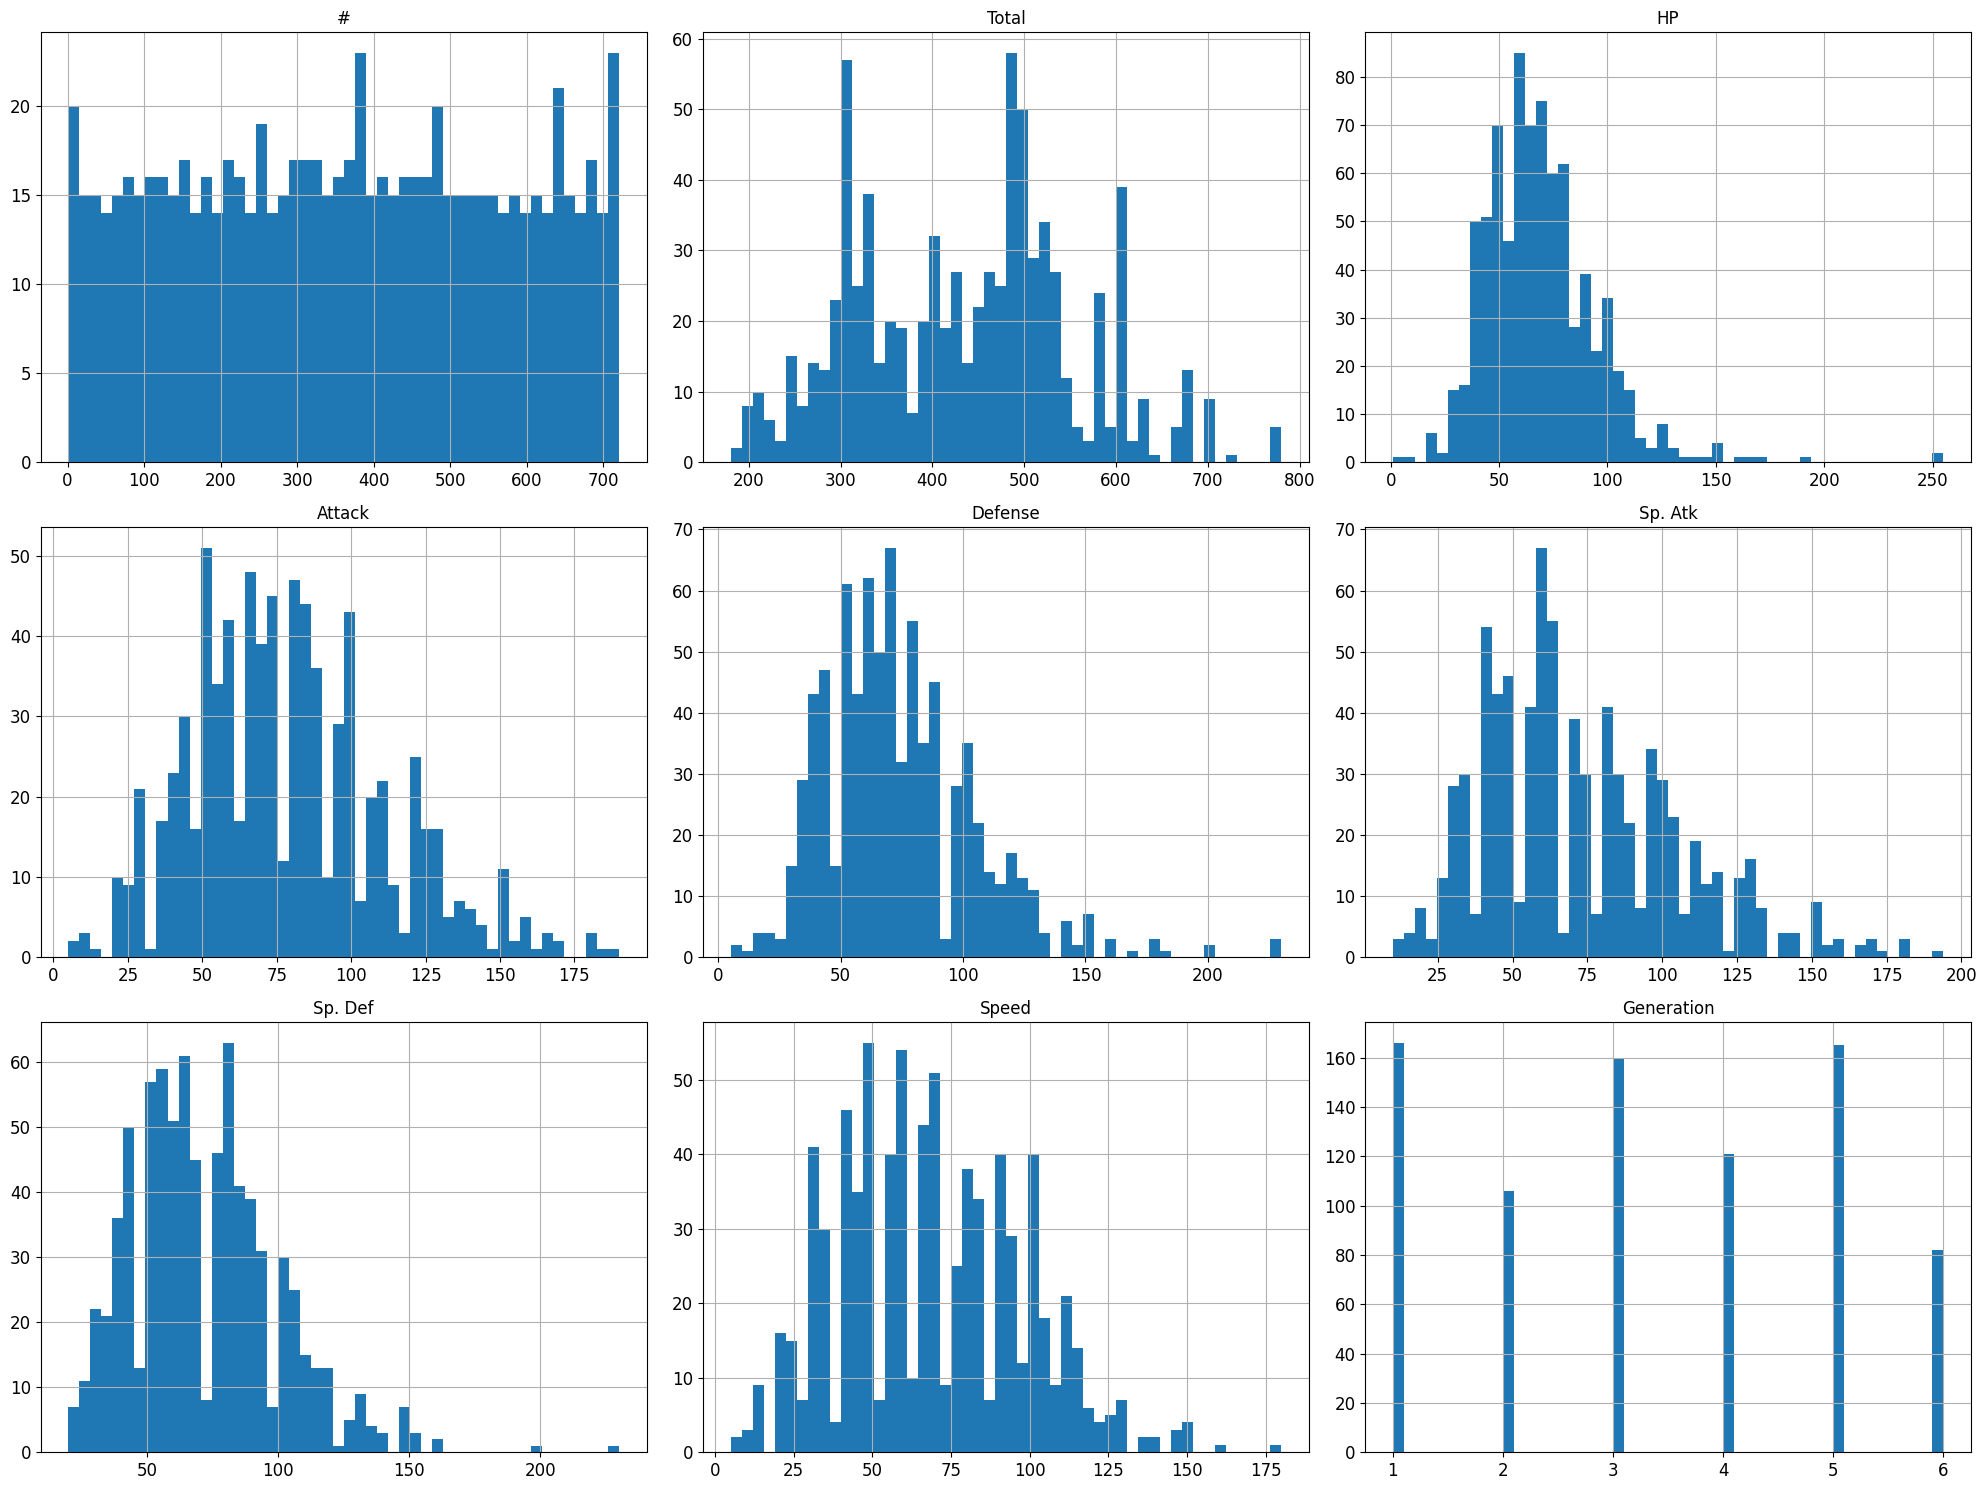

In [150]:
import matplotlib.pyplot as plt

pokemon.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [151]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [152]:
train_set, test_set = split_train_test(pokemon, 0.2)

In [153]:
print(len(train_set))
print(len(test_set))

640
160


In [154]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(pokemon, test_size=0.2, random_state=42)

In [155]:
print(len(train_set))
print(len(test_set))

640
160


<Axes: >

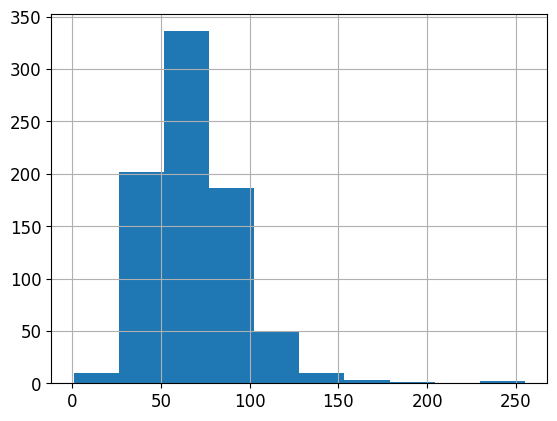

In [156]:
pokemon["HP"].hist()

In [158]:
pokemon["hp_cat"] = pd.cut(pokemon["HP"],
                           bins=[0., 50, 100, 150, np.inf],
                           labels=[1, 2, 3, 4])

In [159]:
pokemon["hp_cat"].value_counts()

hp_cat
2    522
1    211
3     61
4      6
Name: count, dtype: int64

<Axes: >

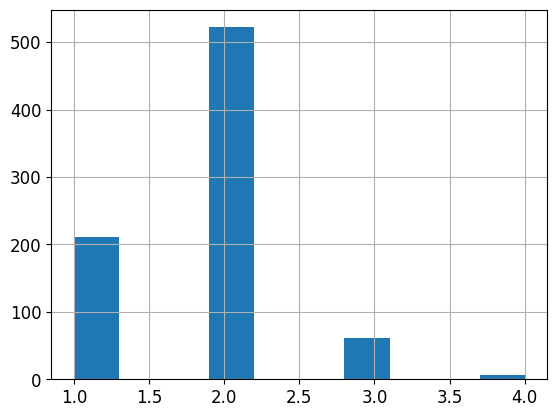

In [160]:
pokemon["hp_cat"].hist()

In [161]:
pokemon.sort_values("HP", ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,hp_cat
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False,4
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False,4
217,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False,4
351,321,Wailord,Water,NaN,500,170,90,45,90,45,60,3,False,4
655,594,Alomomola,Water,NaN,470,165,75,80,40,45,65,5,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False,1
381,349,Feebas,Water,NaN,200,20,15,20,10,55,80,3,False,1
388,355,Duskull,Ghost,NaN,295,20,40,90,30,90,25,3,False,1
55,50,Diglett,Ground,NaN,265,10,55,25,35,45,95,1,False,1
